In [ ]:
#### To install R console in Jupyter notebook following packages are required to be installed in R Console.
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
devtools::install_github('IRkernel/IRkernel')
####  Making the kernel available to Jupyter
IRkernel::installspec(user = FALSE)


In [1]:
## Importing the 'arules' package for market basket analysis
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [2]:
## Since it's transaction data so we will use 'read.transaction' to view the dataset as transaction; 'sep="," means we want to 
## separate each item from one anther
grocery<-read.transactions("groceries.csv",sep = ",")
summary(grocery)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [5]:
### The code below  With 'inspect' function enables us to find first seven transactions with items purchased in each transaction.
inspect(grocery[1:7,])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              
[6] {abrasive cleaner,        
     butter,                  
     rice,                    
     whole milk,              
     yogurt}                  
[7] {rolls/buns}              


In [6]:
### This is the support of Abrasive cleaner means that Abrasive cleaner has appeared or been purchased in (0.003*9835)=29.5 
### transactions out of total 9835 transactions.
itemFrequency(grocery[,1])
print(0.003*9835)

abrasive cleaner 
     0.003558719

[1] 29.505


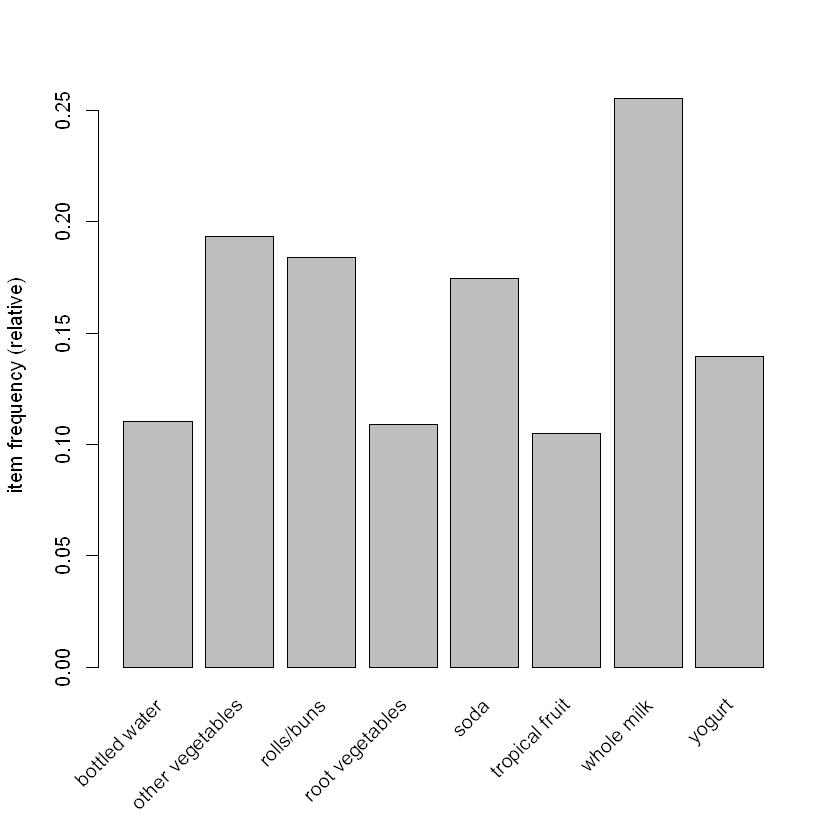

In [7]:
## Now we want items having minimum 10% of of support meaning items appeared at least 10% of the total transaction. Below that
## we will ignore
itemFrequencyPlot(grocery,support=0.10)

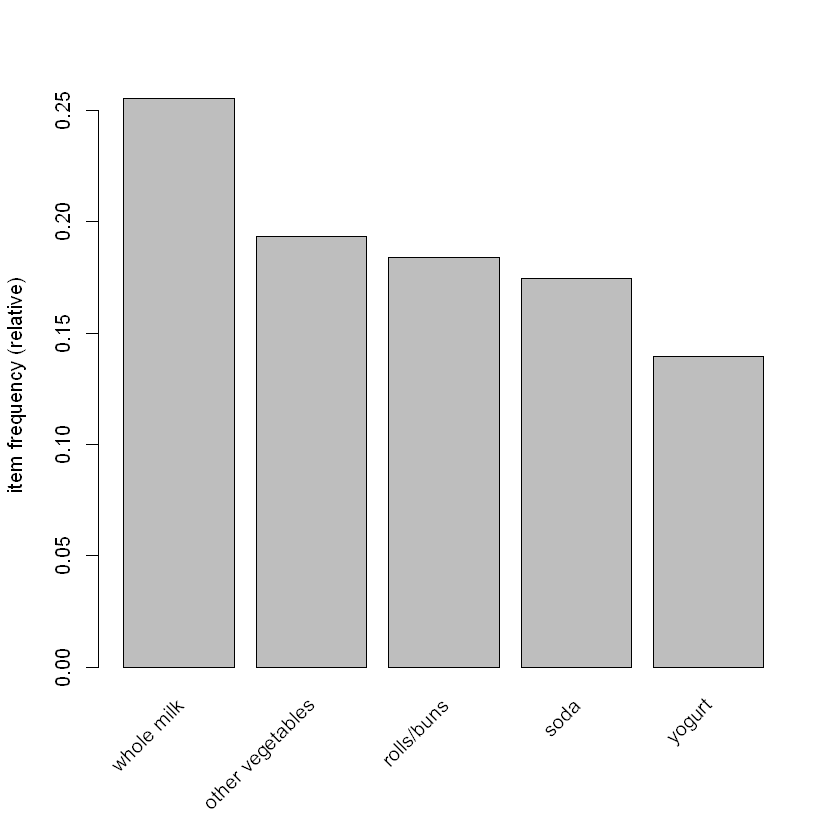

In [8]:
## We want to see top five frequency of items purchased
itemFrequencyPlot(grocery,topN=5)

## support(A)=frq(A)/N
## support(B)=frq(B)/N
## support(A->B)=freq(a & B)/N(total number of Transactions)
## confidence(A->B)=freq(B)/Freq(A) or Support(A,B)/Support(A)
## lift(A->B)=Support(A->B)/Support(A)*Support(B)

In [10]:
## Using apriori algorithm; support=0.007 indicates that we want items that have have been purchased at least 0.7% of total 
## 9835 of transactions i,e at least in 68.84 transactions. We want to keep confidence=0.35,higher the confidence better the 
## rules. minlen=2 indicates that we want minimum 2 items in rules or transactions.
basket<-apriori(grocery,parameter = list(support=0.007,confidence=0.35,minlen=2))
summary(basket)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.35    0.1    1 none FALSE            TRUE       5   0.007      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 68 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [104 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [190 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 190 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
 64 117   9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift           count      
 Min.   :0.007016   Min.   :0.3510   Min.   :1.388   Min.   : 69.0  
 1st Qu.:0.008134   1st Qu.:0.3904   1st Qu.:1.729   1st Qu.: 80.0  
 Median :0.009659   Median :0.4385   Median :1.977   Median : 95.0  
 Mean   :0.012974   Mean   :0.4475   Mean   :2.067   Mean   :127.6  
 3rd Qu.:0.013676   3rd Qu.:0.4923   3rd Qu.:2.285   3rd Qu.:134.5  
 Max.   :0.074835   Max.   :0.6389   Max.   :3.956   Max.   :736.0  

mining info:
    data ntransactions support confidence
 grocery          9835   0.007       0.35

#### rule length distribution (lhs + rhs):sizes
  2   3   4 
 64 117   9 rule length distribution (lhs + rhs):sizes
####  the above figure tells us that 2 items together bought in 64 transactions, 3 items together bought in 117 transactions and 4
#### items together bought in 9 transactions out of total 190 transactions or rules as per given conditions.

### Below we show first five transactions having different support and confidence. Confidence for example o.43 indicates that 
### the likelihood of purchasing 'root vegetables' given than 'herbs' is also purchased. Lift This signifies the likelihood of 
### the itemset Y being purchased when item X is purchased while taking into account the popularity of  Y. in our example lift
### 3.95 signifies that 'root vegetables' is more likely that's 3.95 times along with herbs. Lift greater than 1 is good it means
### y is more likely to br bought given x is also bought. We generally ignore lift less than 1.

In [11]:

inspect(basket[1:5])

    lhs                      rhs                support     confidence lift    
[1] {herbs}               => {root vegetables}  0.007015760 0.4312500  3.956477
[2] {herbs}               => {other vegetables} 0.007727504 0.4750000  2.454874
[3] {herbs}               => {whole milk}       0.007727504 0.4750000  1.858983
[4] {processed cheese}    => {whole milk}       0.007015760 0.4233129  1.656698
[5] {semi-finished bread} => {whole milk}       0.007117438 0.4022989  1.574457
    count
[1] 69   
[2] 76   
[3] 76   
[4] 69   
[5] 70   


In [15]:
## We show top 6 transactions having maximum lift in descending order
inspect(sort(basket,by="lift")[1:6])

    lhs                   rhs                   support confidence     lift count
[1] {herbs}            => {root vegetables} 0.007015760  0.4312500 3.956477    69
[2] {other vegetables,                                                           
     tropical fruit,                                                             
     whole milk}       => {root vegetables} 0.007015760  0.4107143 3.768074    69
[3] {beef,                                                                       
     other vegetables} => {root vegetables} 0.007930859  0.4020619 3.688692    78
[4] {beef,                                                                       
     whole milk}       => {root vegetables} 0.008032537  0.3779904 3.467851    79
[5] {other vegetables,                                                           
     pip fruit}        => {tropical fruit}  0.009456024  0.3618677 3.448613    93
[6] {citrus fruit,                                                               
     other veget

## From the above analysis we can for example [3] {beef,                                                                       
    #### beef,other vegetables} => {root vegetables} 0.007930859  0.4020619 3.688692    78,
## recommend the retailer to cross sell or place root vegetables with other vagetables as the lift(3.68) is much above 1,  that means beef,other vagetables increase the probability of buying
## root vegetables by 3.68 times